In [22]:
import sys

!{sys.executable} -m pip install --upgrade pip 
!{sys.executable} -m pip install watermark

try:
    from SPARQLWrapper import SPARQLWrapper, JSON
except ImportError:
    !{sys.executable} -m pip install sparqlwrapper
    from SPARQLWrapper import SPARQLWrapper, JSON
    
try:
    import requests
except ImportError:
    !{sys.executable} -m pip install requests
    import requests
    
try:
    import pandas as pd
except ImportError:
    !{sys.executable} -m pip install pandas
    import pandas as pd
pd.set_option('display.max_rows', 99999)
pd.set_option('display.max_columns', 99999)
pd.set_option('display.max_colwidth', -1)

In [23]:
sparqlendpoint = SPARQLWrapper("https://nanosafety.rdf.bigcat-bioinformatics.org/sparql")




In [24]:
sparqlquery = '''
PREFIX nsvoc: <https://ammar257ammar.github.com/RDFied-datasets/nanosafery_vocabulary:>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX bao: <http://www.bioassayontology.org/bao#>
PREFIX enm: <http://purl.enanomapper.org/onto/>
PREFIX obo: <http://purl.obolibrary.org/obo/>

SELECT DISTINCT ?id ?label ?title ?type  WHERE { 
    ?s a obo:CHEBI_59999 ; dcterms:identifier ?id; dcterms:title ?title; rdfs:label ?label; dcterms:type ?type.
}
'''
sparqlendpoint.setQuery(sparqlquery)
sparqlendpoint.setReturnFormat(JSON)  
results = sparqlendpoint.query().convert()

df = pd.DataFrame(columns=["ID","Label","Title","Type"])
for result in results["results"]["bindings"]:
    df.loc[len(df.index)] = [result["id"]["value"],result["label"]["value"],result["title"]["value"],result["type"]["value"]]

df = df.sort_values(by=['ID'])

display(df)

,ID,Label,Title,Type
86,https://nanocommons.github.io/identifiers/registry#ERM00000099,MWCNT (Mitsui XNRi-7),multi-walled carbon nanotubes,http://purl.bioontology.org/ontology/npo#NPO_354
51,https://nanocommons.github.io/identifiers/registry#ERM00000100,MWCNTS-COOH,multi-walled carbon nanotubes,http://purl.bioontology.org/ontology/npo#NPO_354
23,https://nanocommons.github.io/identifiers/registry#ERM00000104,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticles,http://purl.bioontology.org/ontology/npo#NPO_1486
16,https://nanocommons.github.io/identifiers/registry#ERM00000105,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticles,http://purl.bioontology.org/ontology/npo#NPO_1486
17,https://nanocommons.github.io/identifiers/registry#ERM00000106,6 TiO2 NP C (anatase),titanium dioxide nanoparticles,http://purl.bioontology.org/ontology/npo#NPO_1486
2,https://nanocommons.github.io/identifiers/registry#ERM00000107,6 TiO2 NP I (anatase),titanium dioxide nanoparticles,http://purl.bioontology.org/ontology/npo#NPO_1486
24,https://nanocommons.github.io/identifiers/registry#ERM00000108,6 TiO2 NP D (anatase/rutile),titanium dioxide nanoparticles,http://purl.bioontology.org/ontology/npo#NPO_1486
68,https://nanocommons.github.io/identifiers/registry#ERM00000109,MWCNTS (NM-401),multi-walled carbon nanotubes,http://purl.bioontology.org/ontology/npo#NPO_354
19,https://nanocommons.github.io/identifiers/registry#ERM00000110,SWCNT(AP-Hipco),single-walled carbon nanotube,http://purl.bioontology.org/ontology/npo#NPO_943
60,https://nanocommons.github.io/identifiers/registry#ERM00000111,Graphene (G),carbon based nanomaterials,http://purl.obolibrary.org/obo/CHEBI_134404


In [72]:
sparqlquery = '''
PREFIX nsvoc: <https://ammar257ammar.github.com/RDFied-datasets/nanosafery_vocabulary:>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX bao: <http://www.bioassayontology.org/bao#>
PREFIX enm: <http://purl.enanomapper.org/onto/>
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX sio: <http://semanticscience.org/resource/>

SELECT DISTINCT  ?type  ?MIE ?MIEtitle WHERE { 
    ?s a obo:CHEBI_59999 ;  dcterms:title ?title ; dcterms:type ?type ; sio:SIO_000636 ?MIE.
    SERVICE <https://aopwiki.rdf.bigcat-bioinformatics.org/sparql> {
    ?MIE dc:title ?MIEtitle.}
}
'''
sparqlendpoint.setQuery(sparqlquery)
sparqlendpoint.setReturnFormat(JSON)  
results = sparqlendpoint.query().convert()

df = pd.DataFrame(columns=["Type","MIE","MIEtitle"])
typestomie = {}
for result in results["results"]["bindings"]:
    df.loc[len(df.index)] = [result["type"]["value"],result["MIE"]["value"],result["MIEtitle"]["value"]]
    if not result["MIEtitle"]["value"] in typestomie:
        typestomie[result["MIEtitle"]["value"]] = 1
    else:
        typestomie[result["MIEtitle"]["value"]] += 1
df = df.sort_values(by=['Type'])

display(df)
print(len(df))
print(typestomie)

,Type,MIE,MIEtitle
81,http://purl.bioontology.org/ontology/npo#NPO_1373,https://identifiers.org/aop.events/1495,Interaction with the lung resident cell membrane components
2,http://purl.bioontology.org/ontology/npo#NPO_1373,https://identifiers.org/aop.events/1752,Increased AngII
50,http://purl.bioontology.org/ontology/npo#NPO_1373,https://identifiers.org/aop.events/1592,ROS generation from photoactivated chemicals
12,http://purl.bioontology.org/ontology/npo#NPO_1373,https://identifiers.org/aop.events/257,"Increase, Reactive oxygen species production"
42,http://purl.bioontology.org/ontology/npo#NPO_1486,https://identifiers.org/aop.events/478,"Activation, NRF2"
24,http://purl.bioontology.org/ontology/npo#NPO_1486,https://identifiers.org/aop.events/1592,ROS generation from photoactivated chemicals
18,http://purl.bioontology.org/ontology/npo#NPO_1486,https://identifiers.org/aop.events/1752,Increased AngII
13,http://purl.bioontology.org/ontology/npo#NPO_1486,https://identifiers.org/aop.events/1194,"Increase, DNA damage"
11,http://purl.bioontology.org/ontology/npo#NPO_1486,https://identifiers.org/aop.events/257,"Increase, Reactive oxygen species production"
47,http://purl.bioontology.org/ontology/npo#NPO_1486,https://identifiers.org/aop.events/396,"Covalent Binding, Protein"


83
{'Increased AngII': 15, 'Increase, DNA damage': 11, 'ROS generation from photoactivated chemicals': 15, 'Increase, Reactive oxygen species production': 15, 'Sensing of the stressor by pulmonary cells': 1, 'Activation, NRF2': 16, 'Histone deacetylase inhibition': 2, 'Interaction with the lung resident cell membrane components': 2, 'Covalent Binding, Protein': 3, 'N/A, Mitochondrial dysfunction 1': 1, 'Blockade, L-Type Calcium Channels ': 2}


In [73]:
df2 = pd.DataFrame.from_dict(typestomie, orient='index')
df2 = df2.sort_values(by=[0], ascending=False)

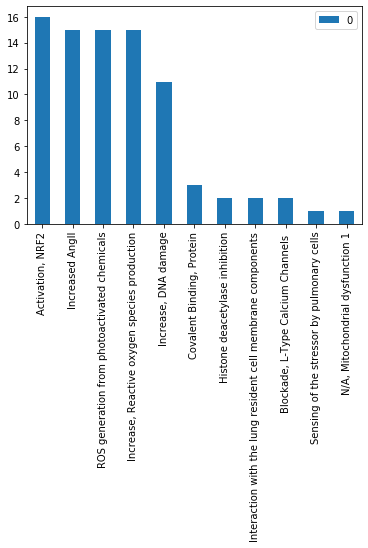

In [74]:
pd.DataFrame(df2).plot(kind='bar')

In [75]:
sparqlquery = '''
PREFIX nsvoc: <https://ammar257ammar.github.com/RDFied-datasets/nanosafery_vocabulary:>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX bao: <http://www.bioassayontology.org/bao#>
PREFIX enm: <http://purl.enanomapper.org/onto/>
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX sio: <http://semanticscience.org/resource/>

SELECT DISTINCT  ?label  ?MIE ?MIEtitle WHERE { 
    ?s a obo:CHEBI_59999 ;  rdfs:label ?label ; dcterms:title ?title ; dcterms:type ?type ; sio:SIO_000636 ?MIE.
    SERVICE <https://aopwiki.rdf.bigcat-bioinformatics.org/sparql> {
    ?MIE dc:title ?MIEtitle.}
}
'''
sparqlendpoint.setQuery(sparqlquery)
sparqlendpoint.setReturnFormat(JSON)  
results = sparqlendpoint.query().convert()

df = pd.DataFrame(columns=["label","MIE","MIEtitle"])
typestomie = {}
for result in results["results"]["bindings"]:
    df.loc[len(df.index)] = [result["label"]["value"],result["MIE"]["value"],result["MIEtitle"]["value"]]
    if not result["MIEtitle"]["value"] in typestomie:
        typestomie[result["MIEtitle"]["value"]] = 1
    else:
        typestomie[result["MIEtitle"]["value"]] += 1
df = df.sort_values(by=['label'])

display(df)
print(len(df))
print(typestomie)

,label,MIE,MIEtitle
18,6 TiO2 NP A (anatase/rutile),https://identifiers.org/aop.events/1752,Increased AngII
110,6 TiO2 NP A (anatase/rutile),https://identifiers.org/aop.events/1194,"Increase, DNA damage"
82,6 TiO2 NP A (anatase/rutile),https://identifiers.org/aop.events/257,"Increase, Reactive oxygen species production"
68,6 TiO2 NP A (anatase/rutile),https://identifiers.org/aop.events/1592,ROS generation from photoactivated chemicals
87,6 TiO2 NP B (anatase/rutile),https://identifiers.org/aop.events/1592,ROS generation from photoactivated chemicals
70,6 TiO2 NP B (anatase/rutile),https://identifiers.org/aop.events/1194,"Increase, DNA damage"
73,6 TiO2 NP B (anatase/rutile),https://identifiers.org/aop.events/1752,Increased AngII
11,6 TiO2 NP B (anatase/rutile),https://identifiers.org/aop.events/257,"Increase, Reactive oxygen species production"
34,6 TiO2 NP C (anatase),https://identifiers.org/aop.events/1752,Increased AngII
29,6 TiO2 NP C (anatase),https://identifiers.org/aop.events/257,"Increase, Reactive oxygen species production"


131
{'Increased AngII': 25, 'Increase, DNA damage': 19, 'ROS generation from photoactivated chemicals': 25, 'Increase, Reactive oxygen species production': 25, 'Sensing of the stressor by pulmonary cells': 4, 'Activation, NRF2': 22, 'Histone deacetylase inhibition': 2, 'Interaction with the lung resident cell membrane components': 3, 'Covalent Binding, Protein': 3, 'N/A, Mitochondrial dysfunction 1': 1, 'Blockade, L-Type Calcium Channels ': 2}


In [76]:
df3 = pd.DataFrame.from_dict(typestomie, orient='index')
df3 = df3.sort_values(by=[0], ascending=False)

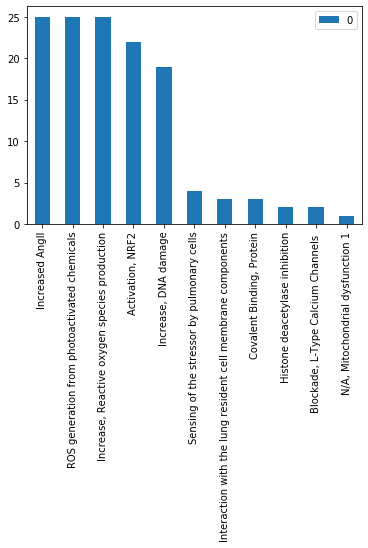

In [86]:
pd.DataFrame(df3).plot(kind='bar')

In [78]:
df3

,0
Increased AngII,25
ROS generation from photoactivated chemicals,25
"Increase, Reactive oxygen species production",25
"Activation, NRF2",22
"Increase, DNA damage",19
Sensing of the stressor by pulmonary cells,4
Interaction with the lung resident cell membrane components,3
"Covalent Binding, Protein",3
Histone deacetylase inhibition,2
"Blockade, L-Type Calcium Channels",2


In [79]:
df2

,0
"Activation, NRF2",16
Increased AngII,15
ROS generation from photoactivated chemicals,15
"Increase, Reactive oxygen species production",15
"Increase, DNA damage",11
"Covalent Binding, Protein",3
Histone deacetylase inhibition,2
Interaction with the lung resident cell membrane components,2
"Blockade, L-Type Calcium Channels",2
Sensing of the stressor by pulmonary cells,1


In [201]:
sparqlquery = '''
PREFIX nsvoc: <https://ammar257ammar.github.com/RDFied-datasets/nanosafery_vocabulary:>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX bao: <http://www.bioassayontology.org/bao#>
PREFIX enm: <http://purl.enanomapper.org/onto/>
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX sio: <http://semanticscience.org/resource/>

SELECT DISTINCT  ?id ?label ?type ?MIE ?MIEtitle WHERE { 
    ?s a obo:CHEBI_59999 ;  dcterms:identifier ?id ; rdfs:label ?label ; dcterms:title ?title ; dcterms:type ?type ; sio:SIO_000636 ?MIE.
    SERVICE <https://aopwiki.rdf.bigcat-bioinformatics.org/sparql> {
    ?MIE dc:title ?MIEtitle.}
}
'''
sparqlendpoint.setQuery(sparqlquery)
sparqlendpoint.setReturnFormat(JSON)  
results = sparqlendpoint.query().convert()

df = pd.DataFrame(columns=["ERM","label","type","MIE","MIEtitle"])
dic = {}
for result in results["results"]["bindings"]:
    df.loc[len(df.index)] = [result["id"]["value"],result["label"]["value"],result["type"]["value"],result["MIE"]["value"],result["MIEtitle"]["value"]]
    if not result["MIEtitle"]["value"] in dic:
        dic[result["MIEtitle"]["value"]] = {}
    if not result["type"]["value"] in dic[result["MIEtitle"]["value"]]:
        dic[result["MIEtitle"]["value"]][result["type"]["value"]] = 1
    else:
        dic[result["MIEtitle"]["value"]][result["type"]["value"]] += 1


display(df)
print(len(df))
print(dic)

,ERM,label,type,MIE,MIEtitle
0,https://nanocommons.github.io/identifiers/registry#ERM00000129,CeO2 NP-C,http://purl.enanomapper.org/onto/ENM_9000006,https://identifiers.org/aop.events/1752,Increased AngII
1,https://nanocommons.github.io/identifiers/registry#ERM00000127,ZnO MP,http://purl.obolibrary.org/obo/CHEBI_36560,https://identifiers.org/aop.events/1194,"Increase, DNA damage"
2,https://nanocommons.github.io/identifiers/registry#ERM00000218,SiO2,http://purl.bioontology.org/ontology/npo#NPO_1373,https://identifiers.org/aop.events/1752,Increased AngII
3,https://nanocommons.github.io/identifiers/registry#ERM00000195,ZnO,http://purl.bioontology.org/ontology/npo#NPO_1542,https://identifiers.org/aop.events/1592,ROS generation from photoactivated chemicals
4,https://nanocommons.github.io/identifiers/registry#ERM00000124,Ag MP,http://purl.obolibrary.org/obo/CHEBI_33964,https://identifiers.org/aop.events/1752,Increased AngII
5,https://nanocommons.github.io/identifiers/registry#ERM00000123,Ag NPNM300K,http://purl.enanomapper.org/onto/ENM_9000236,https://identifiers.org/aop.events/1752,Increased AngII
6,https://nanocommons.github.io/identifiers/registry#ERM00000193,CuNPs,http://purl.enanomapper.org/onto/ENM_9000016,https://identifiers.org/aop.events/1752,Increased AngII
7,https://nanocommons.github.io/identifiers/registry#ERM00000148,Ag NM300K,http://purl.enanomapper.org/onto/ENM_9000236,https://identifiers.org/aop.events/1592,ROS generation from photoactivated chemicals
8,https://nanocommons.github.io/identifiers/registry#ERM00000125,ZnO NPNM110,http://purl.enanomapper.org/onto/ENM_9000205,https://identifiers.org/aop.events/1194,"Increase, DNA damage"
9,https://nanocommons.github.io/identifiers/registry#ERM00000145,PVP-AgNP,http://purl.obolibrary.org/obo/CHEBI_82780,https://identifiers.org/aop.events/257,"Increase, Reactive oxygen species production"


131
{'Increased AngII': {'http://purl.enanomapper.org/onto/ENM_9000006': 3, 'http://purl.bioontology.org/ontology/npo#NPO_1373': 1, 'http://purl.obolibrary.org/obo/CHEBI_33964': 1, 'http://purl.enanomapper.org/onto/ENM_9000236': 2, 'http://purl.enanomapper.org/onto/ENM_9000016': 2, 'http://purl.bioontology.org/ontology/npo#NPO_1486': 6, 'http://purl.bioontology.org/ontology/npo#NPO_1542': 1, 'http://purl.bioontology.org/ontology/npo#NPO_1548': 1, 'http://purl.enanomapper.org/onto/ENM_9000227': 1, 'http://purl.obolibrary.org/obo/CHEBI_36560': 1, 'http://purl.enanomapper.org/onto/ENM_9000205': 1, 'http://purl.obolibrary.org/obo/CHEBI_82780': 2, 'http://purl.bioontology.org/ontology/npo#NPO_1892': 1, 'http://purl.enanomapper.org/onto/ENM_9000210': 1, 'http://purl.enanomapper.org/onto/ENM_0000118': 1}, 'Increase, DNA damage': {'http://purl.obolibrary.org/obo/CHEBI_36560': 1, 'http://purl.enanomapper.org/onto/ENM_9000205': 1, 'http://purl.bioontology.org/ontology/npo#NPO_1486': 6, 'http://p

In [202]:
df4 = pd.DataFrame.from_dict(dic, orient='index')
#df4 = df4.sort_values(by, ascending=False)

In [203]:
df4

,http://purl.enanomapper.org/onto/ENM_9000006,http://purl.bioontology.org/ontology/npo#NPO_1373,http://purl.obolibrary.org/obo/CHEBI_33964,http://purl.enanomapper.org/onto/ENM_9000236,http://purl.enanomapper.org/onto/ENM_9000016,http://purl.bioontology.org/ontology/npo#NPO_1486,http://purl.bioontology.org/ontology/npo#NPO_1542,http://purl.bioontology.org/ontology/npo#NPO_1548,http://purl.enanomapper.org/onto/ENM_9000227,http://purl.obolibrary.org/obo/CHEBI_36560,http://purl.enanomapper.org/onto/ENM_9000205,http://purl.obolibrary.org/obo/CHEBI_82780,http://purl.bioontology.org/ontology/npo#NPO_1892,http://purl.enanomapper.org/onto/ENM_9000210,http://purl.enanomapper.org/onto/ENM_0000118,http://purl.enanomapper.org/onto/CHEBI_133602,http://purl.bioontology.org/ontology/npo#NPO_354,http://purl.enanomapper.org/onto/ENM_0000124,http://purl.enanomapper.org/onto/ENM_0000121,http://purl.obolibrary.org/obo/CHEBI_52733,http://purl.enanomapper.org/onto/ENM_0000120,http://purl.enanomapper.org/onto/ENM_0000123,http://purl.bioontology.org/ontology/npo#NPO_1550,http://purl.enanomapper.org/onto/ENM_0000125,http://purl.enanomapper.org/onto/ENM_0000127,http://purl.enanomapper.org/onto/ENM_0000126,http://purl.enanomapper.org/onto/ENM_0000122,http://purl.obolibrary.org/obo/CHEBI_33416,http://purl.bioontology.org/ontology/npo#NPO_943,http://purl.enanomapper.org/onto/ENM_9000025
"Activation, NRF2",1.0,NaN,1.0,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
"Blockade, L-Type Calcium Channels",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"Covalent Binding, Protein",NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Histone deacetylase inhibition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Increase, DNA damage",3.0,NaN,1.0,2.0,NaN,6.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Increase, Reactive oxygen species production",3.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Increased AngII,3.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interaction with the lung resident cell membrane components,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"N/A, Mitochondrial dysfunction 1",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROS generation from photoactivated chemicals,3.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


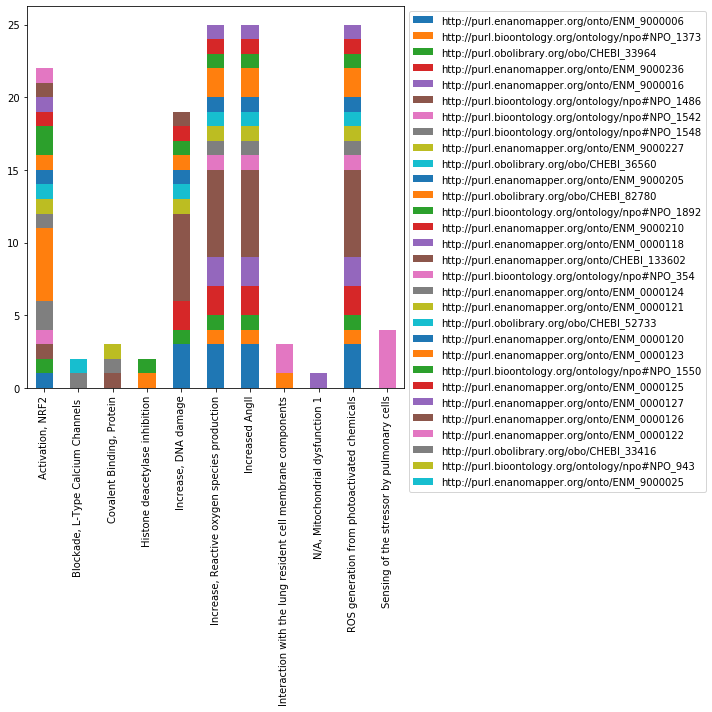

In [204]:
plt.rcParams["figure.autolayout"] = True
pd.DataFrame(df4).plot(kind='bar',stacked='true',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [205]:
sparqlquery = '''
PREFIX nsvoc: <https://ammar257ammar.github.com/RDFied-datasets/nanosafery_vocabulary:>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX bao: <http://www.bioassayontology.org/bao#>
PREFIX enm: <http://purl.enanomapper.org/onto/>
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX sio: <http://semanticscience.org/resource/>

SELECT DISTINCT  ?MIE ?MIEalt ?MIEtitle WHERE { 
    ?s a obo:CHEBI_59999 ;  sio:SIO_000636 ?MIE.
    ?MIE skos:altLabel ?MIEalt .
    SERVICE <https://aopwiki.rdf.bigcat-bioinformatics.org/sparql> {
    ?MIE dc:title ?MIEtitle.}
}
'''
sparqlendpoint.setQuery(sparqlquery)
sparqlendpoint.setReturnFormat(JSON)  
results = sparqlendpoint.query().convert()

df = pd.DataFrame(columns=["MIEtitle","MIEalt"])
dic = {}
for result in results["results"]["bindings"]:
    df.loc[len(df.index)] = [result["MIEtitle"]["value"],result["MIEalt"]["value"]]
    if not result["MIEtitle"]["value"] in dic:
        dic[result["MIEtitle"]["value"]] = [result["MIEalt"]["value"]]
    else:
        dic[result["MIEtitle"]["value"]].append(result["MIEalt"]["value"])
    

display(df)
print(len(df))
print(dic)
groups = dic

,MIEtitle,MIEalt
0,"Increase, DNA damage",DNA damage
1,"Increase, DNA damage",genotoxicity
2,Sensing of the stressor by pulmonary cells,Cellular sensing of the substance-induced damage resulting in the release of danger signals
3,Sensing of the stressor by pulmonary cells,Cellular sensing of substance or substance induced damage
4,Interaction with the lung resident cell membrane components,Interaction with lung cells
5,Histone deacetylase inhibition,histone modifications
6,"Blockade, L-Type Calcium Channels",interruption of calcium sensing receptors
7,ROS generation from photoactivated chemicals,ROS production through endoplasmic reticulum stress
8,ROS generation from photoactivated chemicals,ROS production
9,ROS generation from photoactivated chemicals,ROS (increases in the levels of malondialdehyde (MDA))


25
{'Increase, DNA damage': ['DNA damage', 'genotoxicity'], 'Sensing of the stressor by pulmonary cells': ['Cellular sensing of the substance-induced damage resulting in the release of danger signals', 'Cellular sensing of substance or substance induced damage'], 'Interaction with the lung resident cell membrane components': ['Interaction with lung cells'], 'Histone deacetylase inhibition': ['histone modifications'], 'Blockade, L-Type Calcium Channels ': ['interruption of calcium sensing receptors'], 'ROS generation from photoactivated chemicals': ['ROS production through endoplasmic reticulum stress', 'ROS production', 'ROS (increases in the levels of malondialdehyde (MDA))', 'induction of oxidative stress (CoO> Fe3O4 ? SiO2)', 'production of free radicals'], 'Increased AngII': ['ROS production through endoplasmic reticulum stress', 'ROS production', 'ROS (increases in the levels of malondialdehyde (MDA))', 'induction of oxidative stress (CoO> Fe3O4 ? SiO2)', 'production of free radic

In [206]:
groups

{'Increase, DNA damage': ['DNA damage', 'genotoxicity'],
 'Sensing of the stressor by pulmonary cells': ['Cellular sensing of the substance-induced damage resulting in the release of danger signals',
  'Cellular sensing of substance or substance induced damage'],
 'Interaction with the lung resident cell membrane components': ['Interaction with lung cells'],
 'Histone deacetylase inhibition': ['histone modifications'],
 'Blockade, L-Type Calcium Channels ': ['interruption of calcium sensing receptors'],
 'ROS generation from photoactivated chemicals': ['ROS production through endoplasmic reticulum stress',
  'ROS production',
  'ROS (increases in the levels of malondialdehyde (MDA))',
  'induction of oxidative stress (CoO> Fe3O4 ? SiO2)',
  'production of free radicals'],
 'Increased AngII': ['ROS production through endoplasmic reticulum stress',
  'ROS production',
  'ROS (increases in the levels of malondialdehyde (MDA))',
  'induction of oxidative stress (CoO> Fe3O4 ? SiO2)',
  'pro

In [207]:
# add groups to rows
df4.insert(0, "group", "Any")


In [208]:
df4

,group,http://purl.enanomapper.org/onto/ENM_9000006,http://purl.bioontology.org/ontology/npo#NPO_1373,http://purl.obolibrary.org/obo/CHEBI_33964,http://purl.enanomapper.org/onto/ENM_9000236,http://purl.enanomapper.org/onto/ENM_9000016,http://purl.bioontology.org/ontology/npo#NPO_1486,http://purl.bioontology.org/ontology/npo#NPO_1542,http://purl.bioontology.org/ontology/npo#NPO_1548,http://purl.enanomapper.org/onto/ENM_9000227,http://purl.obolibrary.org/obo/CHEBI_36560,http://purl.enanomapper.org/onto/ENM_9000205,http://purl.obolibrary.org/obo/CHEBI_82780,http://purl.bioontology.org/ontology/npo#NPO_1892,http://purl.enanomapper.org/onto/ENM_9000210,http://purl.enanomapper.org/onto/ENM_0000118,http://purl.enanomapper.org/onto/CHEBI_133602,http://purl.bioontology.org/ontology/npo#NPO_354,http://purl.enanomapper.org/onto/ENM_0000124,http://purl.enanomapper.org/onto/ENM_0000121,http://purl.obolibrary.org/obo/CHEBI_52733,http://purl.enanomapper.org/onto/ENM_0000120,http://purl.enanomapper.org/onto/ENM_0000123,http://purl.bioontology.org/ontology/npo#NPO_1550,http://purl.enanomapper.org/onto/ENM_0000125,http://purl.enanomapper.org/onto/ENM_0000127,http://purl.enanomapper.org/onto/ENM_0000126,http://purl.enanomapper.org/onto/ENM_0000122,http://purl.obolibrary.org/obo/CHEBI_33416,http://purl.bioontology.org/ontology/npo#NPO_943,http://purl.enanomapper.org/onto/ENM_9000025
"Activation, NRF2",Any,1.0,NaN,1.0,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
"Blockade, L-Type Calcium Channels",Any,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"Covalent Binding, Protein",Any,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Histone deacetylase inhibition,Any,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Increase, DNA damage",Any,3.0,NaN,1.0,2.0,NaN,6.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Increase, Reactive oxygen species production",Any,3.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Increased AngII,Any,3.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interaction with the lung resident cell membrane components,Any,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"N/A, Mitochondrial dysfunction 1",Any,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROS generation from photoactivated chemicals,Any,3.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
for i, row in df4.iterrows():
    for group in groups:
        if str(i) == group:
            df4.at[i,'group'] = ';'.join(groups[group])

In [217]:
df4

,group,http://purl.enanomapper.org/onto/ENM_9000006,http://purl.bioontology.org/ontology/npo#NPO_1373,http://purl.obolibrary.org/obo/CHEBI_33964,http://purl.enanomapper.org/onto/ENM_9000236,http://purl.enanomapper.org/onto/ENM_9000016,http://purl.bioontology.org/ontology/npo#NPO_1486,http://purl.bioontology.org/ontology/npo#NPO_1542,http://purl.bioontology.org/ontology/npo#NPO_1548,http://purl.enanomapper.org/onto/ENM_9000227,http://purl.obolibrary.org/obo/CHEBI_36560,http://purl.enanomapper.org/onto/ENM_9000205,http://purl.obolibrary.org/obo/CHEBI_82780,http://purl.bioontology.org/ontology/npo#NPO_1892,http://purl.enanomapper.org/onto/ENM_9000210,http://purl.enanomapper.org/onto/ENM_0000118,http://purl.enanomapper.org/onto/CHEBI_133602,http://purl.bioontology.org/ontology/npo#NPO_354,http://purl.enanomapper.org/onto/ENM_0000124,http://purl.enanomapper.org/onto/ENM_0000121,http://purl.obolibrary.org/obo/CHEBI_52733,http://purl.enanomapper.org/onto/ENM_0000120,http://purl.enanomapper.org/onto/ENM_0000123,http://purl.bioontology.org/ontology/npo#NPO_1550,http://purl.enanomapper.org/onto/ENM_0000125,http://purl.enanomapper.org/onto/ENM_0000127,http://purl.enanomapper.org/onto/ENM_0000126,http://purl.enanomapper.org/onto/ENM_0000122,http://purl.obolibrary.org/obo/CHEBI_33416,http://purl.bioontology.org/ontology/npo#NPO_943,http://purl.enanomapper.org/onto/ENM_9000025
"Activation, NRF2",activation of Nrf2 singling pathway and increased catalase activity,1.0,NaN,1.0,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
"Blockade, L-Type Calcium Channels",interruption of calcium sensing receptors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"Covalent Binding, Protein",Interact with skin proteins,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Histone deacetylase inhibition,histone modifications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Increase, DNA damage",DNA damage;genotoxicity,3.0,NaN,1.0,2.0,NaN,6.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interaction with the lung resident cell membrane components,Interaction with lung cells,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"N/A, Mitochondrial dysfunction 1",mitochondrial dysfunction,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROS generation from photoactivated chemicals,ROS production through endoplasmic reticulum stress;ROS production;ROS (increases in the levels of malondialdehyde (MDA));induction of oxidative stress (CoO> Fe3O4 ? SiO2);production of free radicals,3.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sensing of the stressor by pulmonary cells,Cellular sensing of the substance-induced damage resulting in the release of danger signals;Cellular sensing of substance or substance induced damage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df4.drop_duplicates(subset ="group",
                     keep = False, inplace = True)

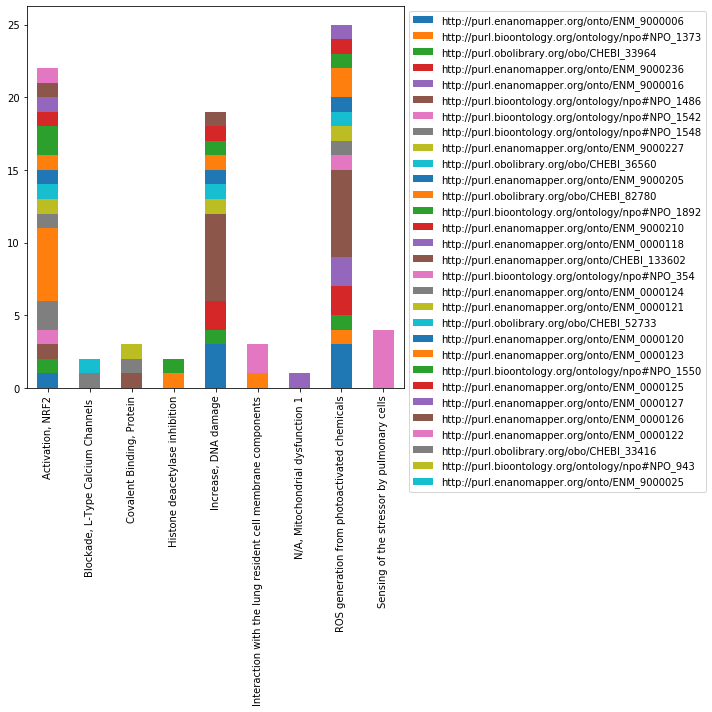

In [218]:
plt.rcParams["figure.autolayout"] = True
pd.DataFrame(df4).plot(kind='bar',stacked='true',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()